In [1]:
# importing packages
import numpy as np
import random
import matplotlib.pyplot as plt

# Genetic Algorithm

In [2]:
def generate_population(size, constraint):
    population = []
    
    while len(population)!=size:
        x1 = random.uniform(0,1)
        x2 = random.uniform(0,1)
        x3 = random.uniform(0,1)
        if constraint(x1,x2,x3):
            individual = {
                "x1": x1,
                "x2": x2,
                "x3": x3,
            }
            population.append(individual)

    return population

In [3]:
def constraint(x1,x2,x3): 
    c1 = (x1**2 + 2*(x2**2) + 3*(x3**2))<=1 
    c2 = x1>=0 and x2>=0 and x3>=0
    return c1 and c2 

In [4]:
def objective_function(individual):
    x1 = individual["x1"]
    x2 = individual["x2"]
    x3 = individual["x3"]
    return x1**0.5 + x2**0.5 + x3**0.5

In [5]:
def choice_by_roulette(sorted_population, fitness_sum):
    
    lowest_fitness = objective_function(sorted_population[0])
    draw = random.uniform(0, 1)
    accumulated = 0
    
    for individual in sorted_population:
        fitness = objective_function(individual)
        probability = fitness / fitness_sum
        accumulated += probability

        if draw <= accumulated:
            return individual

In [9]:
def sort_population_by_fitness(population):
    return sorted(population, key=objective_function)


def crossover(individual_a, individual_b):
    
    w1 = w2 =0.5
    
    x1a = individual_a["x1"]
    x2a = individual_a["x2"]
    x3a = individual_a["x3"]

    x1b = individual_b["x1"]
    x2b = individual_b["x2"]
    x3b = individual_b["x3"]
    
    return {"x1": (w1*x1a + w2*x1b), "x2": (w1*x2a + w2*x2b) , "x3": (w1*x3a+w2*x3b)}


def mutate(individual,constraint):
    next_x1 = individual["x1"] + random.uniform(-0.05, 0.05)
    next_x2 = individual["x2"] + random.uniform(-0.05, 0.05)
    next_x3 = individual["x3"] + random.uniform(-0.05, 0.05)

    return {"x1": next_x1, "x2": next_x2, "x3": next_x3}

In [6]:


def make_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(objective_function(individual) for individual in population)

    for i in range(population_size):
        first_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)
        second_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)

        individual = crossover(first_choice, second_choice)
        individual = mutate(individual,constraint)
        individual['x1'] = min(max(individual['x1'],0),0.9)
        individual['x2'] = min(max(individual['x2'],0),0.9)
        individual['x3'] = min(max(individual['x3'],0),0.9)
        next_generation.append(individual)

    return next_generation

In [7]:
generations = 100

population = generate_population(size=30,constraint=constraint)

best_ones = []

i = 1
while True:
#     print(f"GENERATION {i}")

#     for individual in population:
#         print(individual, objective_function(individual))
        
    if i == generations:
        break
    i += 1

    best_ones.append(objective_function(sort_population_by_fitness(population)[-1]))
    population = make_next_generation(population)
    

best_individual = sort_population_by_fitness(population)[-1]
print("\n FINAL RESULT")
print(best_individual, objective_function(best_individual))


 FINAL RESULT
{'x1': 0.5272776531094844, 'x2': 0.40647668914634816, 'x3': 0.451299302224095} 2.0354822481674546


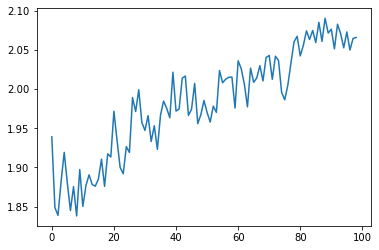

In [8]:
plt.plot(best_ones)

# Particle Swarm Optimization

In [14]:
def objective_function(x):
    return 400/x + 2*np.pi*(x**2)

x= np.linspace(0,200,100)
z = objective_function(x)

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8

# Create particles
n_particles = 20
np.random.seed(100)

# initialize position and velocity
X = np.random.rand(n_particles) * 5
V = np.random.randn(n_particles) * 0.1

# Initialize data
pbest = X.copy()
pbest_obj = objective_function(X)
gbest = pbest[pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

#Function to do one iteration of particle swarm optimization
def update():
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    
    # Update params
    r1, r2 = np.random.rand(2)
    
    # update position and velocity
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest-X)
    X = X + V
    
    # update personal_best and global_best
    obj = objective_function(X)
    pbest[(pbest_obj >= obj)] = X[(pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

for i in range(50):
    update()
    print("best solution in {} - f({:.6f}, {:.6f})={:.10f}".format(i,gbest,200/(np.pi*gbest**2), gbest_obj))

best solution in 0 - f(3.353745, 5.660046)=189.9404448481
best solution in 1 - f(3.353745, 5.660046)=189.9404448481
best solution in 2 - f(3.088642, 6.673366)=189.4465155315
best solution in 3 - f(3.192864, 6.244812)=189.3325546849
best solution in 4 - f(3.192864, 6.244812)=189.3325546849
best solution in 5 - f(3.192864, 6.244812)=189.3325546849
best solution in 6 - f(3.192864, 6.244812)=189.3325546849
best solution in 7 - f(3.185623, 6.273232)=189.3271189288
best solution in 8 - f(3.163862, 6.359824)=189.3225924911
best solution in 9 - f(3.163862, 6.359824)=189.3225924911
best solution in 10 - f(3.163862, 6.359824)=189.3225924911
best solution in 11 - f(3.167412, 6.345574)=189.3221146206
best solution in 12 - f(3.167412, 6.345574)=189.3221146206
best solution in 13 - f(3.167412, 6.345574)=189.3221146206
best solution in 14 - f(3.167412, 6.345574)=189.3221146206
best solution in 15 - f(3.167412, 6.345574)=189.3221146206
best solution in 16 - f(3.167412, 6.345574)=189.3221146206
best so

<ipython-input-14-21b2ff222cbe>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 400/x + 2*np.pi*(x**2)


In [ ]:
pow(100/np.pi, 1/3)

In [ ]:
X = np.random.rand( n_particles) * 5
# p = X
# p[0,0] = 69
X
# X[0]

In [ ]:
import random
import math    # cos() for Rastrigin
import copy    # array-copying convenience
import sys     # max float
 
 

 
# rastrigin function
def fitness_rastrigin(position):
  fitnessVal = 400/position[0] + 2*np.pi*(position[0]**2)
  return fitnessVal

class Particle:
  def __init__(self, fitness, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
 
    # initialize position of the particle with 0.0 value
    self.position = [0.0 for i in range(dim)]
 
     # initialize velocity of the particle with 0.0 value
    self.velocity = [0.0 for i in range(dim)]
 
    # initialize best particle position of the particle with 0.0 value
    self.best_part_pos = [0.0 for i in range(dim)]
 
    # loop dim times to calculate random position and velocity
    # range of position and velocity is [minx, max]
    for i in range(dim):
      self.position[i] = ((maxx - minx) *
        self.rnd.random() + minx)
      self.velocity[i] = ((maxx - minx) *
        self.rnd.random() + minx)
 
    # compute fitness of particle
    self.fitness = fitness(self.position) # curr fitness
 
    # initialize best position and fitness of this particle
    self.best_part_pos = copy.copy(self.position)
    self.best_part_fitnessVal = self.fitness # best fitness
 
# particle swarm optimization function
def pso(fitness, max_iter, n, dim, minx, maxx):
  # hyper parameters
  w = 0.8    # inertia
  c1 = 0.2 # cognitive (particle)
  c2 = 0.2 # social (swarm)
 
  rnd = random.Random(0)
 
  # create n random particles
  swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]
 
  # compute the value of best_position and best_fitness in swarm
  best_swarm_pos = [0.0 for i in range(dim)]
  best_swarm_fitnessVal = sys.float_info.max # swarm best
 
  # computer best particle of swarm and it's fitness
  for i in range(n): # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)
 
  # main loop of pso
  Iter = 0
  while Iter < max_iter:
     
    # after every 10 iterations
    # print iteration number and best fitness value so far
    if Iter % 10 == 0 and Iter > 1:
      print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
 
    for i in range(n): # process each particle
       
      # compute new velocity of curr particle
      for k in range(dim):
        r1 = rnd.random()    # randomizations
        r2 = rnd.random()
     
        swarm[i].velocity[k] = (
                                 (w * swarm[i].velocity[k]) +
                                 (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                 (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                               ) 
 
 
        # if velocity[k] is not in [minx, max]
        # then clip it
        if swarm[i].velocity[k] < minx:
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx:
          swarm[i].velocity[k] = maxx
 
 
      # compute new position using new velocity
      for k in range(dim):
        swarm[i].position[k] += swarm[i].velocity[k]
   
      # compute fitness of new position
      swarm[i].fitness = fitness(swarm[i].position)
 
      # is new position a new best for the particle?
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = copy.copy(swarm[i].position)
 
      # is new position a new best overall?
      if swarm[i].fitness < best_swarm_fitnessVal:
        best_swarm_fitnessVal = swarm[i].fitness
        best_swarm_pos = copy.copy(swarm[i].position)
     
    # for-each particle
    Iter += 1
  #end_while
  return best_swarm_pos
# end pso
 
 
#----------------------------
# Driver code for rastrigin function
 
print("\nBegin particle swarm optimization on rastrigin function\n")
dim = 1
fitness = fitness_rastrigin
 
 
print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")
 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")
 
 
 
best_position = pso(fitness, max_iter, num_particles, dim, 0, 10.0)
 
print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)
 
print("\nEnd particle swarm for rastrigin function\n")

In [ ]:
from pyswarm import pso

def banana(x):
    x1 = x[0]
    x2 = x[1]
    return 2*np.pi*(x1**2) + 2*np.pi*x1*x2

def con(x):
    x1 = x[0]
    x2 = x[1]
    return [np.pi*(x1**2)*x2-200]

lb = [0, 0]
ub = [8, 8]

xopt, fopt = pso(banana, lb, ub, f_ieqcons=con)
xopt, fopt

In [ ]:
from functools import partial
import numpy as np

def _obj_wrapper(func, x):
    return func(x)

def _is_feasible_wrapper(func, x):
    return np.all(func(x)>=0)

def _cons_f_ieqcons_wrapper(f_ieqcons, x):
    return np.array(f_ieqcons(x))
    
def pso1(func, lb, ub, f_ieqcons=None, swarmsize=100, 
         w1=0.5, c1=0.5, c2=0.5, maxiter=100, 
        minstep=1e-8, minfunc=1e-8, debug=False,
        particle_output=False):
    
    assert len(lb)==len(ub), 'Lower- and upper-bounds must be the same length'
    assert hasattr(func, '__call__'), 'Invalid function handle'
    lb = np.array(lb)
    ub = np.array(ub)
    assert np.all(ub>lb), 'All upper-bound values must be greater than lower-bound values'
   
    vhigh = np.abs(ub - lb)
    vlow = -vhigh

    # Initialize objective function
    obj = partial(_obj_wrapper, func)
    
    # Check for constraint function(s) #########################################
    if debug:
        print('Single constraint function given in f_ieqcons')
    cons = partial(_cons_f_ieqcons_wrapper, f_ieqcons)
    is_feasible = partial(_is_feasible_wrapper, cons)
        
    # Initialize the particle swarm ############################################
    S = swarmsize
    D = len(lb)  # the number of dimensions each particle has
    x = np.random.rand(S, D)  # particle positions
    v = np.zeros_like(x)  # particle velocities
    p = np.zeros_like(x)  # best particle positions
    fx = np.zeros(S)  # current particle function values
    fs = np.zeros(S, dtype=bool)  # feasibility of each particle
    fp = np.ones(S)*np.inf  # best particle function values
    g = []  # best swarm position
    fg = np.inf  # best swarm position starting value
    
    # Initialize the particle's position
    x = lb + x*(ub - lb)

    # Calculate objective and constraints for each particle
    for i in range(S):
        fx[i] = obj(x[i, :])
        fs[i] = is_feasible(x[i, :])
       
    # Store particle's best position (if constraints are satisfied)
    i_update = np.logical_and((fx < fp), fs)
    p[i_update, :] = x[i_update, :].copy()
    fp[i_update] = fx[i_update]

    # Update swarm's best position
    i_min = np.argmin(fp)
    if fp[i_min] < fg:
        fg = fp[i_min]
        g = p[i_min, :].copy()
   
    # Initialize the particle's velocity
    v = vlow + np.random.rand(S, D)*(vhigh - vlow)
       
    # Iterate until termination criterion met
    it = 1
    while it <= maxiter:
        r1 = np.random.uniform(size=(S, D))
        r2 = np.random.uniform(size=(S, D))

        # Update the particles velocities
        v = w1*v + c1*r1*(p - x) + c2*r2*(g - x)
        
        # Update the particles' positions
        x = x + v
        
        # Correct for bound violations
        maskl = x < lb
        masku = x > ub
        x = x*(~np.logical_or(maskl, masku)) + lb*maskl + ub*masku

        # Update objectives and constraints
        for i in range(S):
            fx[i] = obj(x[i, :])
            fs[i] = is_feasible(x[i, :])

        # Store particle's best position (if constraints are satisfied)
        i_update = np.logical_and((fx < fp), fs)
        p[i_update, :] = x[i_update, :].copy()
        fp[i_update] = fx[i_update]

        # Compare swarm's best position with global best position
        i_min = np.argmin(fp)
        if fp[i_min] < fg:
            if debug:
                print('New best for swarm at iteration {:}: {:} {:}'\
                    .format(it, p[i_min, :], fp[i_min]))

            p_min = p[i_min, :].copy()
            stepsize = np.sqrt(np.sum((g - p_min)**2))

            if np.abs(fg - fp[i_min]) <= minfunc:
                print('Stopping search: Swarm best objective change less than {:}'\
                    .format(minfunc))
                if particle_output:
                    return p_min, fp[i_min], p, fp
                else:
                    return p_min, fp[i_min]
            elif stepsize <= minstep:
                print('Stopping search: Swarm best position change less than {:}'\
                    .format(minstep))
                if particle_output:
                    return p_min, fp[i_min], p, fp
                else:
                    return p_min, fp[i_min]
            else:
                g = p_min.copy()
                fg = fp[i_min]

        if debug:
            print('Best after iteration {:}: {:} {:}'.format(it, g, fg))
        it += 1

    print('Stopping search: maximum iterations reached --> {:}'.format(maxiter))
    
    if not is_feasible(g):
        print("However, the optimization couldn't find a feasible design. Sorry")
    if particle_output:
        return g, fg, p, fp
    else:
        return g, fg

In [ ]:
pso1(banana, lb, ub, f_ieqcons=con,debug=True)